# Pandas and the DataFrames:
- What problem does the pandas solves ?
  -->Python has long been great for data munging and preparation, but less so for data analysis and modeling. pandas helps
  fill this gap, enabling you to carry put your entire data analysis workflow in python without having to switch to a
  more domain specific language like R.
- Data structure most relavent to data maniplation pandas offer is DataFrame.
- A matric has row and columns. A data frame has observation and variables.
- manipulating dataframes in pandas can be usefull in all steps of sata scienstific methods like;
    - Exploratory data analysis
    - Data wranglin 
    - Data preprocessing 
    - Building models
    - Visualization
- Pandas can be used to import relational database, html files, matlab database, xl files.
"""

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sales_data = pd.read_csv('sales.csv', index_col=0)# index_col=0 --> disable default integer index
store = pd.read_csv('visitors.csv')
sales_data.head()

,signup,visitors,sale
city,,,
City_1,27,123,7992
City_2,44,332,11292
City_3,55,432,16534
City_4,23,434,15545
City_5,73,221,4433


###  Create DataFrame using dictionary

In [5]:
data = {
    'weekday':['Sun', 'Sun', 'Mon', 'Mon'],
    'city':['Austin', 'Dallas', 'Austin', 'Dallas'],
    'visitor':[120, 223,432,232],
    'signup': [7, 4,5, 3]
}

users = pd.DataFrame(data)

In [6]:
# Setting column ans index name
users = pd.DataFrame(data, columns=['weekday', 'city', 'visitor', 'signup'])

users = pd.DataFrame(data, columns=['weekday', 'city', 'visitor', 'signup'],
                    index=['One', 'Two', 'Three', 'Four'])
users['Date'] = ['December 1', 'January 1', 'mid-May', 'March 2']
users

,weekday,city,visitor,signup,Date
One,Sun,Austin,120,7,December 1
Two,Sun,Dallas,223,4,January 1
Three,Mon,Austin,432,5,mid-May
Four,Mon,Dallas,232,3,March 2


In [10]:
#Each col is a series 
type(users['weekday'])

pandas.core.series.Series

In [11]:
# set multi index state name and city name on above reduce dataframe 
#census = census.set_index(['STNAME', 'CTYNAME'])
#census

### Creatig dataframe using multiple series

In [ ]:
purchase_1 = pd.Series({'Name': 'Chris',
                        'Item Purchased': 'Dog Food',
                        'Cost': 22.50})
purchase_2 = pd.Series({'Name': 'Kevyn',
                        'Item Purchased': 'Kitty Litter',
                        'Cost': 2.50})
purchase_3 = pd.Series({'Name': 'Vinod',
                        'Item Purchased': 'Bird Seed',
                        'Cost': 5.00})

df = pd.DataFrame([purchase_1, purchase_2, purchase_3], index=['Store 1', 'Store 1', 'Store 2'])

# Name the people who purchased more than $3
df['Name'][df['Cost']>3]

# drop index wjhich is NaN (missing value) - remove entire row whose value is missing
df2 = df.copy()
df2.dropna()
df2.index
df

### Other way to create dataframe

In [ ]:
cities = ['Austin', 'Dallas', 'Austin', 'Dallas']
visitor = [123,332,432,434]
signup = [7, 4,5, 3]
weekdays = ['Sun', 'Sun', 'Mon', 'Mon']
list_label  = ['city', 'signup', 'visitors', 'weekdays']
list_col = [cities, signup, visitor, weekdays]
zipped = list(zip(list_label, list_col))

data = dict(zipped)
users_dup = pd.DataFrame(data)


In [ ]:
# use of date
dates = pd.date_range('20130101', periods=6)
df_dates = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
type(df_dates['A']) #this is a series
print(df_dates)

### Series

In [ ]:
# Create a series using list
animal = ['Tiger', 'Bear', 'Moose']
pd.Series(animal)

# None - panda set data type as object
animal = ['Tiger', 'Bear', None]
pd.Series(animal)

# create series using list and passing index
s = pd.Series(['Tiger', 'Bear', 'Moose'], index=['India', 'America', 'Canada'])

In [ ]:
# Create a series using dictionary
sports = {'Archery': 'Bhutan',
          'Golf': 'Scotland',
          'Sumo': 'Japan',
          'Taekwondo': 'South Korea'
         }
s = pd.Series(sports)
s.index

In [ ]:
# Accessing series element using loc/iloc or []
print(s.loc['Sumo'])
print(s.iloc[2])
print(s['Sumo'])

###  Indexing/Slicing dataframe

In [ ]:
# using [] - Use for access columns but also can be used to access (rows X columns)

print(store)
print()

# Selecting single value in a column
print(store.visitors[3]) # 3rd element of visitor column

# Selecting entire column
print(store['visitors']) # Entire 'visitors' column

# Selecting multiple columns
store[['signup', 'visitors']]

# Accessing single value corresponding to particular row and column
print("Visitors in City_1: ", store['visitors'][1]) #Here ['visitor'] is col label and 1 is row


# Selecting multiple row
df_dates[0:3] 
df_dates['20130102':'20130104'] 


In [ ]:
### Accessing columns
df_dates['A'] # Access entire column 'A' 
df_dates.A # OR  Access entire column 'A'

In [ ]:
# using loc[row:row, col:col] - use when label names are known
### Use for accessing row or (row X columns)

df_dates.loc['20130102'] # Accessing entire row

#### Accessing combination of rows and columns
###############################################
store.loc[3]['visitors'] # 3rd row and visitor column
store.loc[3, 'visitors'] # 3rd row and visitor column
store.loc[:, 'city':'visitors'] #select all rows and some columns
store.loc[2, 'city':'visitors'] # select 2nd row and'city', 'signup', visitors' columns.
store.loc[0:2, 'visitors':'weekdays'] #Here 0-2 rows and two columns are 'visitors', 'weekdays'
store.loc[1:2, 'signup':'visitors'] # Here rows are 1 to 2 and columns are 'signup', 'visitors'
store.loc[:, store.isnull().any()] #return all row; any column that has NaN value
store.loc[:, store.notnull().all()] # return all rows; columns that has no NaN value means all data present in every col


In [ ]:
# using iloc[row:row, col:col] - use when label names are not known in that case integer row/col numbers to be passed
### Use for accessing row or (row X columns)

df_dates.iloc[3] # Accessing entire row 

#### Accessing combination of rows and columns
###############################################
store.iloc[3, 3] # iloc[row:row, col:col]
store.iloc[1:3, :] # Here two rows and all columns
store.iloc[1:2, 1:3] # a block from middle of the dataframe
store.iloc[[0,2,3], 0:2]  #three rows and two column

In [ ]:
# Reduce data only that you want to see
# list the columns that want to keep, project those and assign resulting dataframe to df variable
columns_to_keep = [
    "STNAME",
    "CTYNAME",
    "BIRTHS2010",
    "BIRTHS2011",
    "BIRTHS2013"
]
census = census[columns_to_keep] # census is now reduced dataframe
 

In [ ]:
""" 
### Index methods and properties ###
append - Concatenate with additional Index objects, producing a new Index
diff - Compute set difference as an Index
intersection - Compute set intersection
union - Compute set union
isin - Compute boolean array indicating whether each value is contained in the passed collection
delete - Compute new Index with element at index i deleted
drop - Compute new index by deleting passed values
insert - Compute new Index by inserting element at index i
is_monotonic - Returns True if each element is greater than or equal to the previous element
is_unique - Returns True if the Index has no duplicate values
unique - Compute the array of unique values in the Index
""" 

In [35]:
# Reindexing on a series
obj = pd.Series([1,2,3,4], index=list('abcd'))
obj2 = obj.reindex(list('wxys'), fill_value=0) # fill missing value to 0


# Reindexing index on dataframe
frame = pd.DataFrame(np.arange(9).reshape(3,3), index=['a', 'b', 'c'],
                    columns=['Ohio', 'Texas', 'California'])
frame2 = frame.reindex(['a', 'b', 'c', 'd'], fill_value=0)
# Reindexing coulumns on dataframe
states = ['Texas','Utah', 'California']
frame.reindex(columns=states)
# Both can be applied in one shot
frame2 = frame.reindex(index=['a', 'b', 'c', 'd'], fill_value=1,
                      columns=states)
frame2

,Texas,Utah,California
a,1,1,2
b,4,1,5
c,7,1,8
d,1,1,1


In [ ]:
""" 
### reindex function arguments ###
index - New sequence to use as index. Can be Index instance or any other sequence-like Python data structure. An
Index - will be used exactly as is without any copying
method - Interpolation (fill) method, see Table 5-4 for options.
fill_value - Substitute value to use when introducing missing data by reindexing
limit - When forward- or backfilling, maximum size gap to fill
level - Match simple Index on level of MultiIndex, otherwise select subset of
copy - Do not copy underlying data if new index is equivalent to old index. True by default (i.e. always copy data
""" 

In [36]:
# accessing elements of row
frame2.loc['a', ['Texas', 'California']]

Texas         1
California    2
Name: a, dtype: int64

### Filtering

In [37]:
#filter cities where visitors are more than 400
store[store.visitors > 400]
#filter cities where visitors are more than 300
store.city[store.visitors > 300]

1    Dallas
2    Austin
3    Dallas
Name: city, dtype: object

In [38]:
# Boolean masking to help filter
enough_visitors = store.visitors > 400
store[enough_visitors] #should give same result as one above

,city,signup,visitors,weekdays
2,Austin,5,432,Mon
3,Dallas,3,434,Mon


In [39]:
# Combining filters
df1 = store[ (store.visitors > 100) & (store.visitors < 300) ]
print(df1)
print()
df2 = store[ (store.visitors > 300) | (store.visitors < 400) ]
print(df2)

     city  signup  visitors weekdays
0  Austin       7       123      Sun

     city  signup  visitors weekdays
0  Austin       7       123      Sun
1  Dallas       4       332      Sun
2  Austin       5       432      Mon
3  Dallas       3       434      Mon


### Cleaning and filling missing values

In [40]:
# Drop nan on row
store.dropna(how='any')

,city,signup,visitors,weekdays
0,Austin,7,123,Sun
1,Dallas,4,332,Sun
2,Austin,5,432,Mon
3,Dallas,3,434,Mon


In [41]:
#drop nan on column
store['visitors'].dropna()

0    123
1    332
2    432
3    434
Name: visitors, dtype: int64

In [12]:
# drop nan in dataframe 
#df_dates.dropna()
#df_dates.dropna(how='all')
#df_dates.dropna(axis=1, how='all')

In [ ]:
# Fill missing value with 5
df_dates = df_dates.fillna(value=5)

In [ ]:
# To get the boolean mask where values are nan.
pd.isna(df_dates)

In [ ]:
df_dates.isnull()
# boolean masking
df_dates[df_dates.notnull()]

### Setting value

In [ ]:
# Setting values by label
df_dates.at[dates[0], 'A'] = 0

In [ ]:
# Setting values by position:
df_dates.iat[0, 1] = 0
df_dates.iat[1, 1] = 20000
df_dates.iat[1, 2] = 40000
df_dates

### Merging dataframe

In [ ]:
df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])

In [ ]:
new_df = pd.merge(users,df, how='outer', left_index=True, right_index=True)
new_df = new_df.reset_index()
new_df # this has unclear data now

In [14]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
'data1': range(7)})
df2 = pd.DataFrame( {'key': ['a', 'b', 'd'],
'data2': range(3)})
#didn’t specify which column to join on. If not specified, merge uses the overlapping column names as the keys
pd.merge(df1,df2)
# It’s a good practice to specify explicitly, though:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [44]:
# Another example
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')

# merging above two df (Full outer join) include all staff and all students
# joining left and right indices into single index column
dup_1 = pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

# merging two df (inner join) includes those who are both staff and students
# join common objects
dup_2 = pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

# merging two df (left join) includes staff regardless of student or not
dup_3 = pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

#  list of all of the students and their roles if they were also staff.
dup_4 = pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

In [45]:
# Dataframe arithmatic
df1 = pd.DataFrame(np.arange(9).reshape((3, 3)), columns=list('bcd'),
                    index=['Ohio', 'Texas', 'Colorado'])

df2 = pd.DataFrame(np.arange(12).reshape((4, 3)), columns=list('acd'),
                    index=['Ohio', 'Texas', 'Colorado', 'calif'])

df1+df2 
#OR
df1.add(df2, fill_value=0)

,a,b,c,d
Colorado,6.0,6.0,14.0,16.0
Ohio,0.0,0.0,2.0,4.0
Texas,3.0,3.0,8.0,10.0
calif,9.0,NaN,10.0,11.0


### Concatenating Along an Axis

In [46]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])
### CASE-1
# By default concat works along axis=0 , producing another rows
#pd.concat([s1, s2, s3])

### CASE-2
# If you pass axis=1 , the result will instead be a column ( axis=1 is the columns)
#pd.concat([s1, s2, s3], axis=1)
#In case-2 there is no overlap on the other axis, which as you can see is the sorted
#union (the 'outer' join) of the indexes

#### CASE-3
# intersect overlap index passing join='inner'
#s4 = pd.concat([s1 * 5, s3])
#print()
#print(pd.concat([s1, s4], axis=1, join='inner')) # show only overlapping index

### CASE-4
# create a hierarchical index on the concatenation axis. To do this,use the keys argument:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])
print(result)

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64


In [18]:
# Concatenate dataframes columns creating a hierarchical index 
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
        columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
    columns=['three', 'four'])
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

/home/uib14108/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [48]:
# DataFrames, combine_first to concat
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan],'b': [np.nan, 2., np.nan, 6.], 'c': range(2, 18, 4)})
df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.],'b': [np.nan, 3., 4., 6., 8.]})
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


### Removing duplicates

In [20]:
dup = pd.DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
    'k2': [1, 1, 2, 3, 3, 4, 4]})
dup

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [50]:
# The DataFrame method duplicated returns a boolean Series indicating whether each
#row is a duplicate or not:
dup.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [51]:
# remove duplicate from all columns in dataset and return new dataframe
dup = pd.DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
    'k2': [1, 1, 2, 3, 3, 4, 4]})
new_df = dup.drop_duplicates()

dup = pd.DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
    'k2': [1, 1, 2, 3, 3, 4, 4]})
# remove duplicates from column 'k1'
new_df = dup.drop_duplicates(['k1'])
new_df

,k1,k2
0,one,1
3,two,3


### apply()

In [52]:
# Another frequent operation is applying a function on 1D arrays to each column or row.
#DataFrame’s apply method does exactly this:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)), columns=list('bcd'),
                    index=['Ohio', 'Texas', 'Colorado'])
print(frame)
f = lambda x : x.max() - x.min()
frame.apply(f, axis=0) # apply on columns
frame.apply(f, axis=1) # apply on row

          b  c  d
Ohio      0  1  2
Texas     3  4  5
Colorado  6  7  8


Ohio        2
Texas       2
Colorado    2
dtype: int64

### Axis indices with duplicate values

In [53]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj['a'] # value belongs to all 'a' 

a    0
a    1
dtype: int64

In [54]:
# The index’s is_unique property can tell you whether its values are unique or not:
obj.index.is_unique

False

### Computing Descriptive Statistics

In [ ]:
"""
pandas objects are equipped with a set of common mathematical and statistical meth-
ods. Most of these fall into the category of reductions or summary statistics, methods
that extract a single value (like the sum or mean) from a Series or a Series of values from
the rows or columns of a DataFrame.

count - Number of non-NA values
describe - Compute set of summary statistics for Series or each DataFrame column
min, max - Compute minimum and maximum values
argmin, argmax - Compute index locations (integers) at which minimum or maximum value obtained, respectively
idxmin, idxmax - Compute index values at which minimum or maximum value obtained, respectively
quantile - Compute sample quantile ranging from 0 to 1
sum - Sum of values
mean - Mean of values
median - Arithmetic median (50% quantile) of values
mad - Mean absolute deviation from mean value
var - Sample variance of values
std - Sample standard deviation of values
skew - Sample skewness (3rd moment) of values
kurt - Sample kurtosis (4th moment) of values
cumsum - Cumulative sum of values
cummin, cummax - Cumulative minimum or maximum of values, respectively
cumprod - Cumulative product of values
diff - Compute 1st arithmetic difference (useful for time series)
pct_change - Compute percent changes
"""

In [55]:
dframe = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
    [np.nan, np.nan], [0.75, -1.3]],
    index=['a', 'b', 'c', 'd'],
    columns=['one', 'two'])
# column sum
dframe.sum()
# row sum 
dframe.sum(axis=1)
# NA values are excluded unless the entire slice (row or column in this case) is NA. This
# can be disabled using the skipna option
dframe.mean(axis=1, skipna=False)
#Some methods, like idxmin and idxmax , return indirect statistics like the index value
#where the minimum or maximum values are attained
dframe.idxmax()
#Other methods are accumulations:
dframe.cumsum()
#Another type of method is neither a reduction nor an accumulation. describe is one
#such example, producing multiple summary statistics in one shot
dframe.describe()


,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


### Plotting

In [56]:
# Cities on X-axis and sale on Y-axis
y_axis = sales_data['sale'].values
x_axis = sales_data['sale'].index

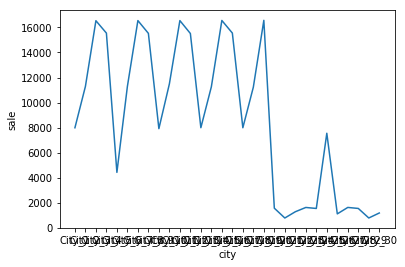

In [57]:
# Plot showing sales across all the cities
plt.plot(x_axis, y_axis)
plt.xlabel('city')
plt.ylabel('sale')
plt.show()

In [58]:
# cities with mid range sale between 10000 to 150000
mid_sales = sales_data[ (sales_data['sale'] > 10000) & (sales_data['sale'] < 15000)] #Returns dataframe

In [59]:
mid_sales_y_axis = mid_sales['sale'].values
mid_sales_x_axis = mid_sales['sale'].index

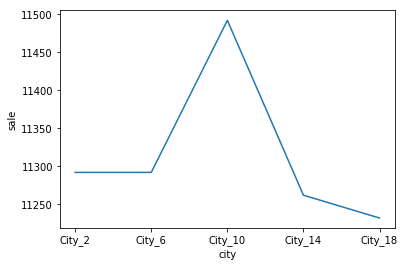

In [60]:
# Plot graph showing mid rang sale
plt.plot(mid_sales_x_axis, mid_sales_y_axis)
plt.xlabel('city')
plt.ylabel('sale')
plt.show()

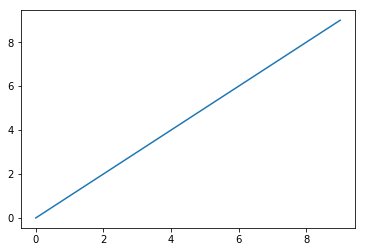

In [61]:
plt.plot(np.arange(10))

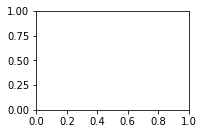

In [62]:
# Figures and sub plots
#Plots in matpotlibs reside within figure object. To create a new figure:
fig = plt.figure()
# You can't make a plot with blank figure. You have to create one or more subplots using add_subplot:
ax1 = fig.add_subplot(2,2,1) #This means that the figure should be 2 × 2, and we’re selecting the first of 4 subplots(numbered from 1)



In [63]:
# you create the next two subplots,
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)


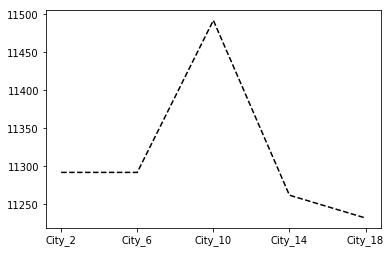

In [64]:
from numpy.random import randn
#plt.plot(randn(50).cumsum(), 'k--') #'k--' is a style option instructing matplotlib to plot a black dashed line
plt.plot(mid_sales_x_axis, mid_sales_y_axis, 'k--')

In [65]:
# Adjusting spacing around subplots
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

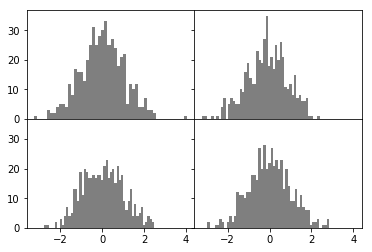

In [66]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

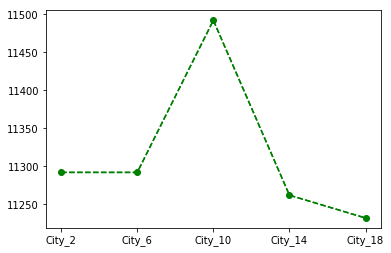

In [67]:
# color and line styles
plt.plot(mid_sales_x_axis, mid_sales_y_axis, linestyle='--',color='g')
# color and marker the line
plt.plot(mid_sales_x_axis, mid_sales_y_axis,'ko--',color='g')

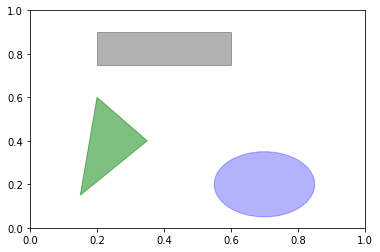

In [68]:
# To add a shape to a plot, you create the patch object shp and add it to a subplot by
#calling ax.add_patch(shp)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [69]:
# plotting and saving in a file

Text(11.5, 0.5, 'sale')

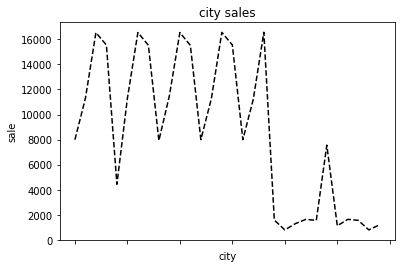

In [70]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
spx = sales_data['sale']
spx.plot(ax=ax, style='k--')
ax.set_title('city sales')
plt.savefig('figpath.svg')
plt.xlabel('city')
plt.ylabel('sale')

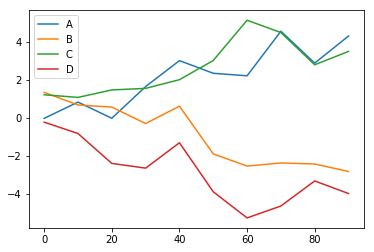

In [71]:
#Plotting dataframe
dframes = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
    columns=['A', 'B', 'C', 'D'], index=np.arange(0, 100, 10))
dframes.plot()

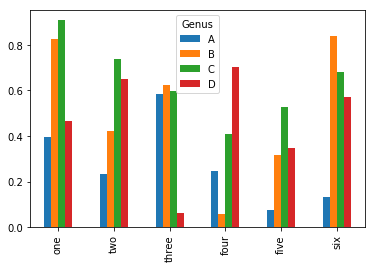

In [72]:
# Bar Plots
dframes = pd.DataFrame(np.random.rand(6, 4),index=['one', 'two', 'three', 'four', 'five', 'six'],
    columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
dframes.plot(kind='bar')

Text(0, 0.5, 'sale')

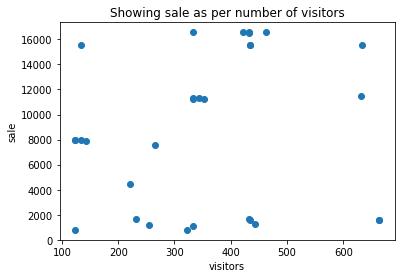

In [73]:
# scattered plot
plt.scatter(sales_data['visitors'], sales_data['sale'])
plt.title('Showing sale as per number of visitors')
plt.xlabel('visitors')
plt.ylabel('sale')

### Dropping entries from an axis

In [75]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
# Drop single row
new_obj = obj.drop('c') 
# Drop multiple rows
new_obj = obj.drop(['c','d'])

In [76]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
      index=['Ohio', 'Colorado', 'Utah', 'New York'],
      columns=['one', 'two', 'three', 'four'])
# Drop two row from dataframe
data.drop(['Colorado', 'Ohio'])
# Drop column from dataframe
data.drop('two', axis=1)


,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


### Other Attributes examples

In [77]:
### If first row is not header then set header to None
### reading | separated table
### here names attribute is equivalant to columns in csv file
### Telling panda that user_id goint to be index column (to get rid of default integer index)

In [23]:
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('http://bit.ly/movieusers', sep='|', header=None, names=user_cols, index_col = 'user_id') 
#users

In [ ]:
print("shape: ",users.shape)
print("columns:", users.columns)
print("type: ",type(users.columns))
print("indeces: ", users.index)

In [ ]:
data_array = users.values #convert dataframe to array
data_array

In [ ]:
#return last rows
users.tail()

In [ ]:
users.info()

In [ ]:
# series or column
users.gender 

In [ ]:
users.describe

In [ ]:
users.describe(include='object') #describe only objects

In [ ]:
users.rename(columns={'user_id':'serial_no'}) #rename header columns 

In [ ]:
print(sales_data.head())
# Scalar multiplication on dataframe
sales_data.loc['City_5':'City_10', 'sale']*69  #converting sales in Dollar to Rupee by scalar multiplication 
# sum a series
series_sum = sales_data.sale.sum()
print("Total sale: ", series_sum)

In [ ]:
# Calculate average sale
series_count = sales_data.sale.count() # count() - Return number of non-NA/null observation in the series
evarage_sale = series_sum/series_count
print("Average sale: ",evarage_sale)

In [ ]:
# Pivot table
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                       'B': ['A', 'B', 'C'] * 4,
                       'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                       'D': np.random.randn(12),
                       'E': np.random.randn(12)})

# produce pivot tables from this data
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])